In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [4]:
df.dropna(inplace=True)
df.head(20)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
1896,1325431680,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000
2333,1325457900,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000
3612,1325534640,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
4553,1325591100,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000
4710,1325600520,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000


In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df['hour_of_day'] = df['Timestamp'].dt.hour

scaler = StandardScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']] = scaler.fit_transform(
    df[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']])

df['Price_Movement'] = np.where(df['Close'].shift(-1) > df['Close'], 'Up',
                                np.where(df['Close'].shift(-1) < df['Close'], 'Down', 'Stable'))

df = df.dropna()
df.head(20)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,day_of_week,hour_of_day,Price_Movement
0,2011-12-31 07:52:00,-0.667460,-0.667402,-0.667510,-0.667450,-0.290268,-0.275059,-0.667469,5,7,Stable
478,2011-12-31 15:50:00,-0.667460,-0.667402,-0.667510,-0.667450,1.266019,-0.273685,-0.667469,5,15,Up
547,2011-12-31 16:59:00,-0.667448,-0.667382,-0.667498,-0.667430,0.934179,-0.273944,-0.667454,5,16,Up
548,2011-12-31 17:00:00,-0.667439,-0.667381,-0.667489,-0.667429,-0.010581,-0.274801,-0.667448,5,17,Stable
1224,2012-01-01 04:16:00,-0.667439,-0.667381,-0.667489,-0.667429,-0.256016,-0.275027,-0.667448,6,4,Up
1896,2012-01-01 15:28:00,-0.667410,-0.667352,-0.667460,-0.667400,0.022152,-0.274754,-0.667419,6,15,Up
2333,2012-01-01 22:45:00,-0.667392,-0.667334,-0.667442,-0.667383,0.025426,-0.274740,-0.667401,6,22,Stable
3612,2012-01-02 20:04:00,-0.667392,-0.667334,-0.667442,-0.667383,0.318324,-0.274445,-0.667401,0,20,Up
4553,2012-01-03 11:45:00,-0.667357,-0.667299,-0.667406,-0.667347,-0.225994,-0.274988,-0.667366,1,11,Down
4710,2012-01-03 14:22:00,-0.667377,-0.667319,-0.667426,-0.667367,-0.282922,-0.275050,-0.667386,1,14,Up


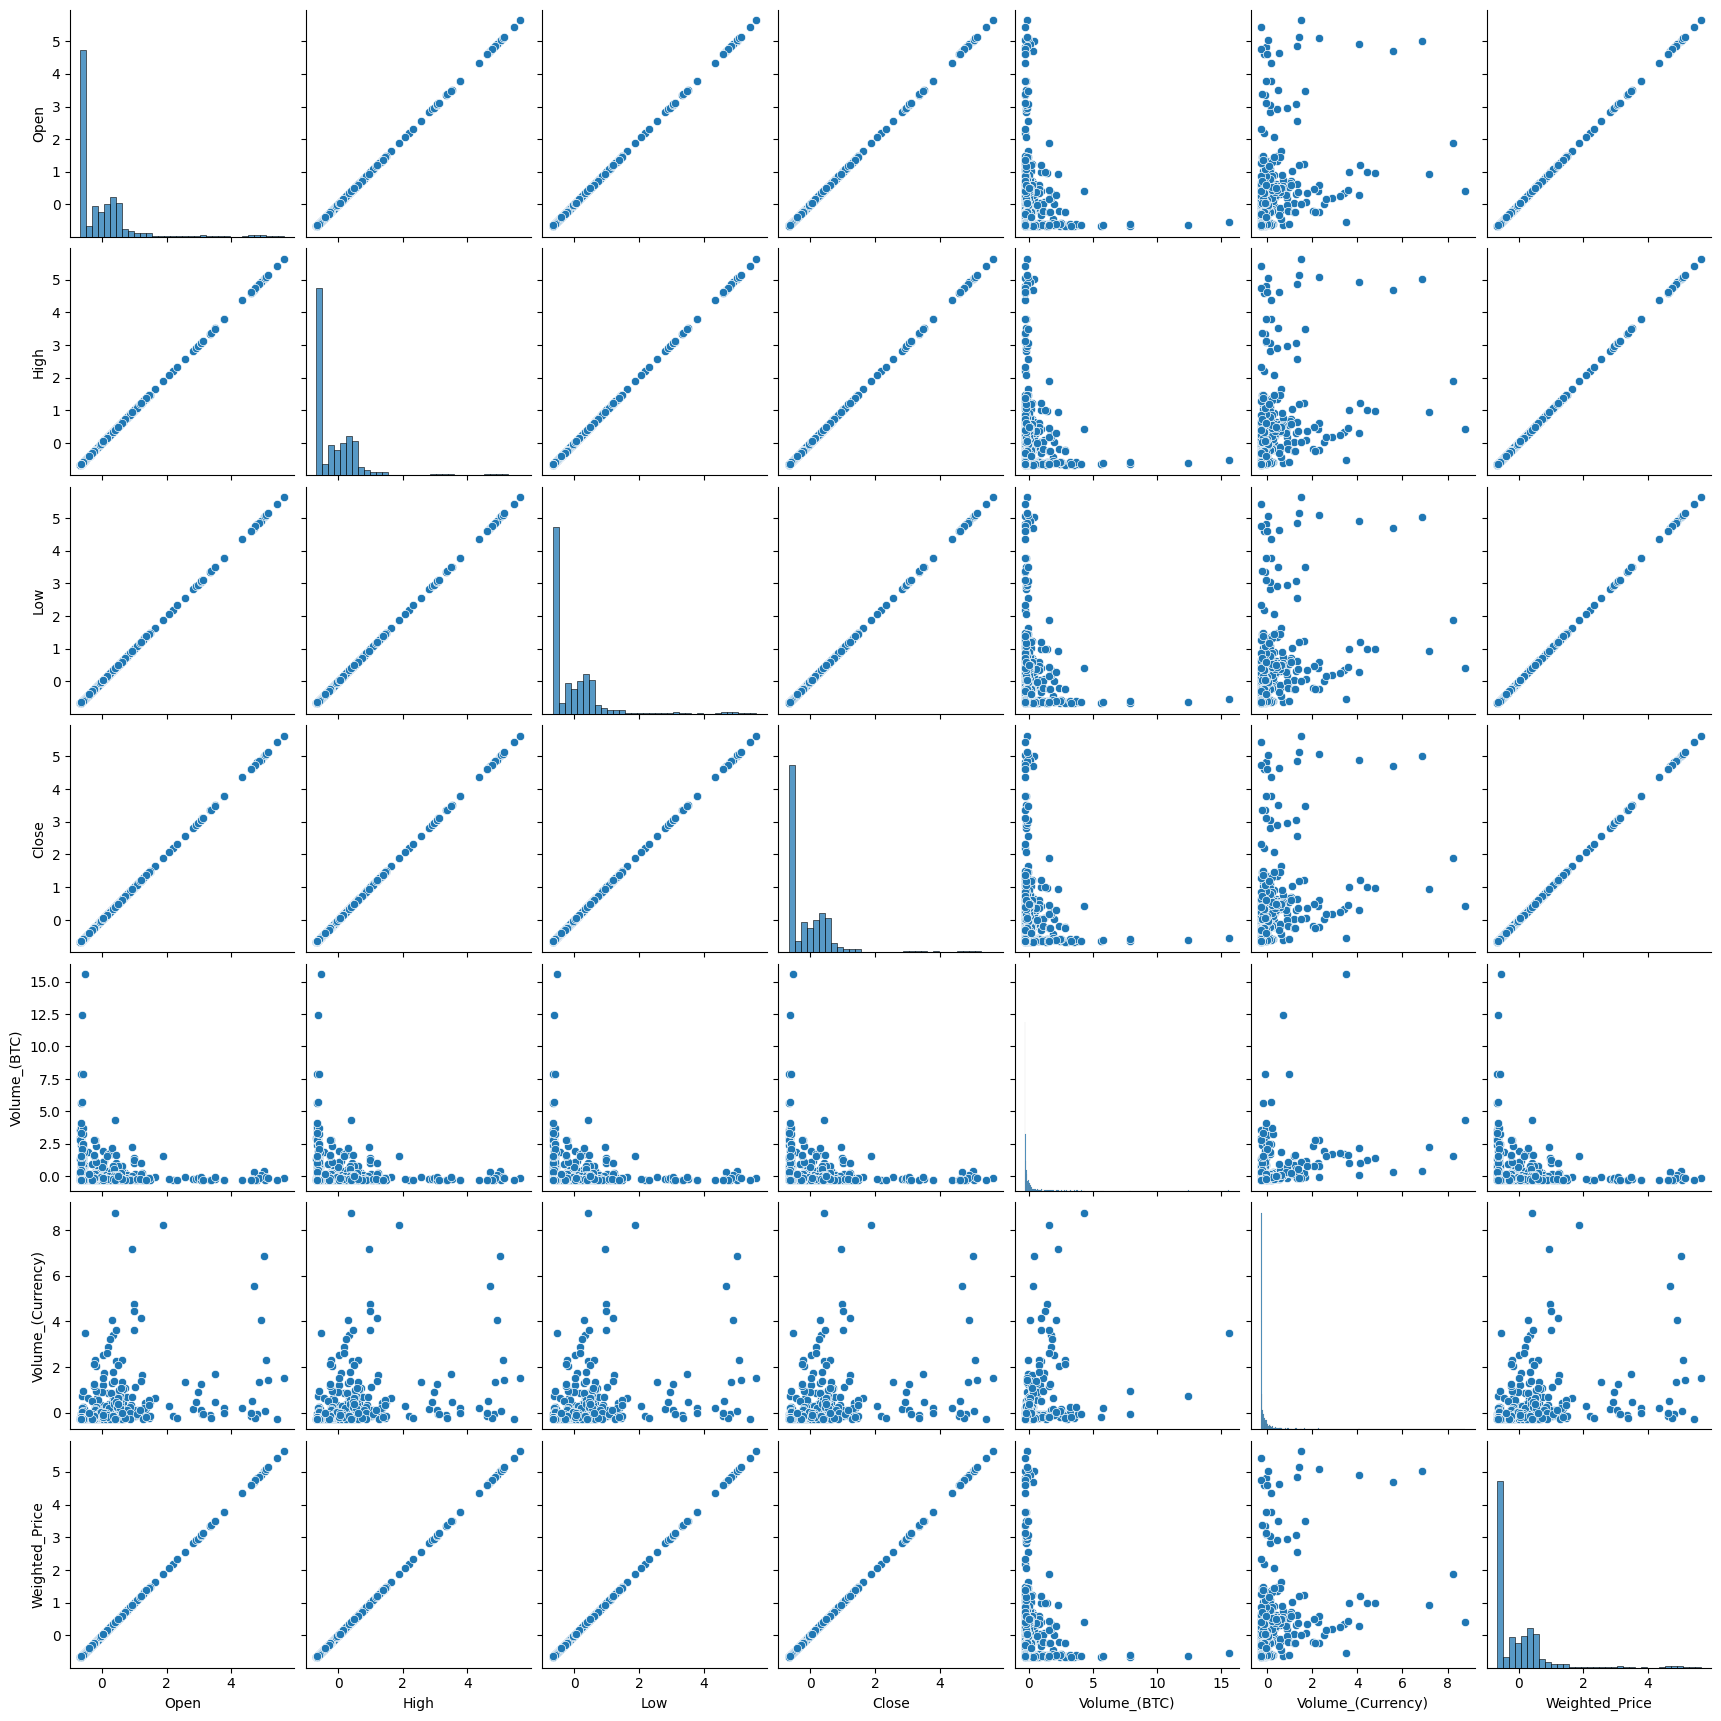

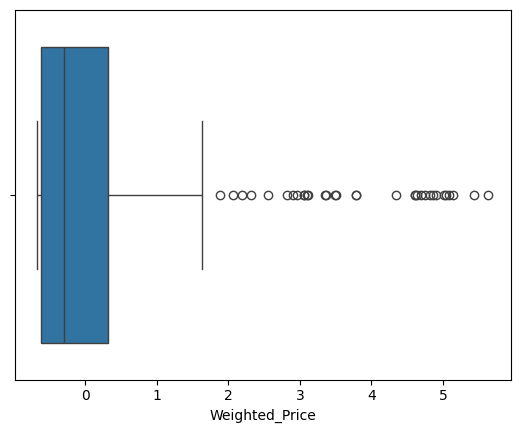

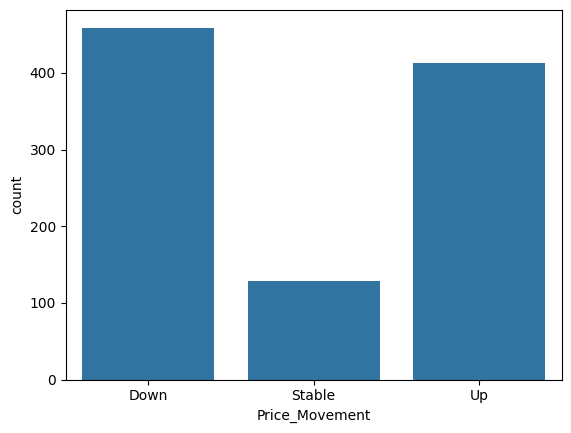

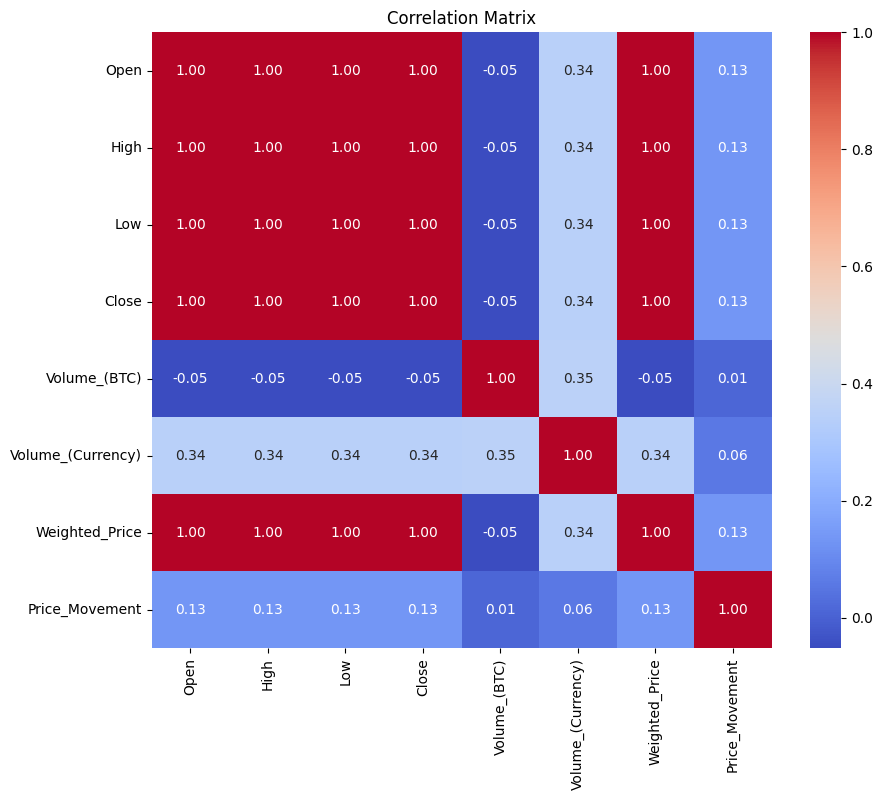

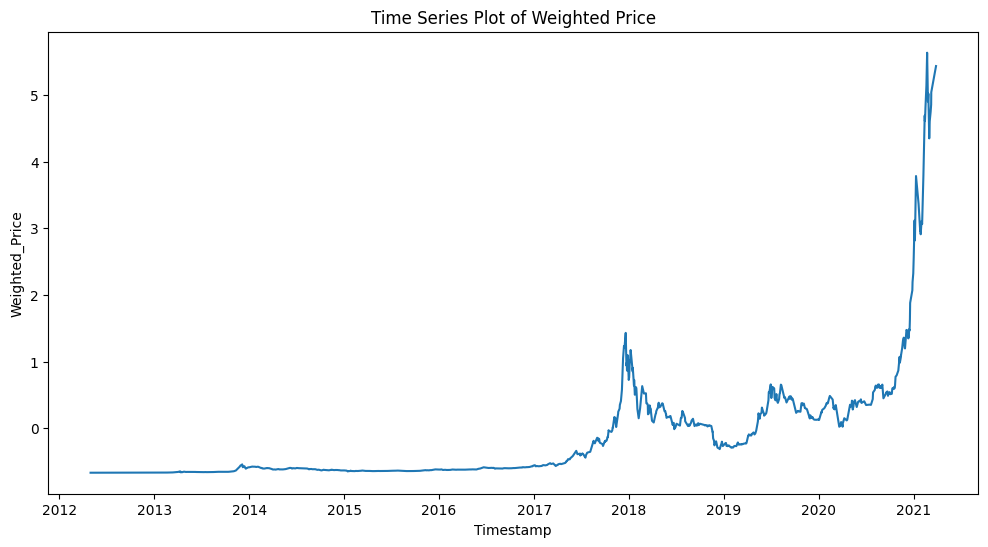

In [10]:
sampled_df = df.sample(n=1000)
sns.pairplot(sampled_df[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']])
plt.show()

sns.boxplot(x=sampled_df['Weighted_Price'])
plt.show()

sns.countplot(x='Price_Movement', data=sampled_df)
plt.show()
categorical_cols = ['Price_Movement']

df_categorical = df[categorical_cols].apply(lambda x: pd.factorize(x)[0])

df_combined = pd.concat([df.select_dtypes(include=['float64']), df_categorical], axis=1)

correlation_matrix = df_combined.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Weighted_Price', data=sampled_df)
plt.title('Time Series Plot of Weighted Price')
plt.show()

In [11]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'day_of_week', 'hour_of_day']]
y = df['Price_Movement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_jobs=-1, random_state=42)

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.46527725892904087
Classification Report:
               precision    recall  f1-score   support

        Down       0.46      0.43      0.45    313263
      Stable       0.46      0.10      0.16     91902
          Up       0.47      0.60      0.53    317589

    accuracy                           0.47    722754
   macro avg       0.46      0.38      0.38    722754
weighted avg       0.46      0.47      0.45    722754

Confusion Matrix:
 [[135452   5671 172140]
 [ 39052   9229  43621]
 [120844   5145 191600]]
